<a href="https://colab.research.google.com/github/Armifara/Deep-Learning/blob/main/4_Sentiment_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis
1. 0 --> Negative Sentiment
2. 1 --> Positive Sentiment

In [45]:
from warnings import filterwarnings
filterwarnings('ignore')

In [46]:
url1 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/Restaurant_Reviews.tsv"
print(url1)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/Restaurant_Reviews.tsv


In [47]:
# sep='\t' has to be added for .tsv files to run

import pandas as pd
df = pd.read_csv(url1, sep='\t')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [48]:
# EX: .lower() is used to convert text to lower case

a = 'WOW!'
a.lower()

'wow!'

In [49]:
# import re: This line imports the regular expression module in Python, which provides functions for working with regular expressions.
  # a.lower(): This part takes the variable a (which was assigned the string 'WOW!' in a previous cell) and converts it to lowercase, resulting in the string 'wow!'.
  # re.sub('[^a-z0-9 ]', " ", a.lower()): This is the core of the code.
  # re.sub(): This is the function from the re module used for substitution.
  # '[^a-z 0-9]': This is the regular expression pattern. As explained before, it matches any character that is not a lowercase letter (a-z), a digit (0-9), or a space ( ).
    # In the string 'wow!', the character '!' matches this pattern.
  # " ": This is the replacement string. Any character matched by the pattern will be replaced by a single space.
  # a.lower(): This is the input string where the substitution is performed, which is 'wow!'.

import re
re.sub('[^a-z 0-9]', " ", a.lower())

'wow '

In [50]:
# .strip() removed the extra spaces (if puntuation is present) from the start and end of the string

import re
def preprocess_text(text: str) -> str:
  text = text.lower()
  text = re.sub('[^a-z0-9 ]', " ", text)
  return text.strip()

In [51]:
preprocess_text(a)

'wow'

# Step 2 - Preprocessing on Entire Reviews

In [52]:
# .to_frame() is used to convert stuff to dataframe format
X = df['Review'].apply(preprocess_text)
X.head()

,Review
0,wow loved this place
1,crust is not good
2,not tasty and the texture was just nasty
3,stopped by during the late may bank holiday of...
4,the selection on the menu was great and so wer...


# Step 3 - Apply TF-IDF Vectorizer

In [53]:
# .toarray() is used to convert stuff to array format

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_pre = tfidf.fit_transform(X).toarray()
X_pre

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
X_pre.shape

(1000, 2037)

### ML & DL has Curse of Dimensionality --> So Overfitting is possible
1. SVD (Singular Value Decomposition) is utilized, reduces dimensionality --> Selects data with the most value
2. Truncated SVD is used as well

# This is called Latent Semantic Analysis

# Step 4 - Dimensionality Reduction --> SVD

In [55]:
# from sklearn.decomposition import TruncatedSVD: This line imports the TruncatedSVD class from the decomposition module within the sklearn (scikit-learn) library.
  # Scikit-learn is a popular Python library for machine learning.

# svd = TruncatedSVD(n_components=300):
  # This line creates an instance of the TruncatedSVD model.

# n_components=300: This is a crucial parameter. It specifies the desired number of dimensions after the reduction.
  # Your original data X_pre had 2037 dimensions.
  # By setting n_components=300, you are telling the TruncatedSVD model to reduce the dimensionality of the data from 2037 to 300.
  # The idea is to keep the 300 components that capture the most variance or information in the original data.


from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=300)
X_pre_red = svd.fit_transform(X_pre)
X_pre_red

array([[ 0.11432469,  0.17293351,  0.30736056, ...,  0.03857796,
         0.04231676, -0.03964358],
       [ 0.1999467 ,  0.04762652,  0.10645152, ...,  0.02371072,
        -0.03283689, -0.06384574],
       [ 0.24604891, -0.0566443 , -0.09170689, ..., -0.02161501,
        -0.01293481,  0.00278677],
       ...,
       [ 0.25750687,  0.22173723, -0.23975805, ...,  0.00617137,
        -0.01976443,  0.00856909],
       [ 0.22886179,  0.08056855, -0.0996798 , ...,  0.01822927,
         0.03358438, -0.01014117],
       [ 0.22460378,  0.02676482, -0.01757699, ..., -0.00282748,
        -0.00758883,  0.00077702]])

In [56]:
X_pre_red.shape

(1000, 300)

In [57]:
Y = df['Liked']
Y.head()

,Liked
0,1
1,0
2,0
3,1
4,1


In [58]:
Y.value_counts()

,count
Liked,
1,500
0,500


# Step 5 - Train Test Split

In [59]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X_pre_red, Y, test_size=0.2, random_state=42
)

In [60]:
xtrain

array([[ 0.22656395, -0.13420655, -0.05562327, ..., -0.00681828,
         0.01786597,  0.01541956],
       [ 0.04627147,  0.0107326 ,  0.03524944, ..., -0.02657139,
        -0.09504081,  0.01894639],
       [ 0.19817878, -0.12899938, -0.09654189, ...,  0.01678169,
        -0.0015429 ,  0.04047869],
       ...,
       [ 0.28383987,  0.09002939,  0.32036279, ..., -0.00143629,
        -0.01298506,  0.01771169],
       [ 0.16548343, -0.06681069, -0.05774483, ...,  0.00795622,
         0.00763153, -0.02659583],
       [ 0.17671247,  0.045545  ,  0.02254962, ..., -0.03044811,
        -0.015384  , -0.03195671]])

In [61]:
xtest

array([[ 7.92404269e-02,  1.40703005e-01, -6.33969277e-02, ...,
        -1.74241661e-02,  3.44549963e-03,  3.84908631e-04],
       [ 2.54152563e-01, -7.51061160e-02, -3.99049147e-02, ...,
         1.16588345e-02,  1.22419686e-02, -1.41601141e-02],
       [ 2.65930515e-01,  4.89400805e-03,  9.98400947e-02, ...,
         4.47728497e-03, -1.49473070e-03, -1.97103445e-02],
       ...,
       [ 1.50649424e-01,  1.56079858e-01,  2.33244323e-01, ...,
        -1.83734937e-02,  3.53993088e-03, -2.61175494e-03],
       [ 1.47123619e-01,  2.16383908e-01, -2.03887993e-01, ...,
         3.57181334e-03, -2.29822637e-02, -2.14541284e-04],
       [ 3.23496882e-01, -2.75771379e-02,  2.25262464e-02, ...,
         4.70123254e-02,  2.16304007e-03,  2.68194377e-04]])

In [62]:
ytrain.head()

,Liked
29,0
535,1
695,0
557,0
836,1


In [63]:
ytest.head()

,Liked
521,1
737,1
740,1
660,1
411,1


In [64]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((800, 300), (200, 300), (800,), (200,))

# Step 6 - Buld the Neural Network

In [65]:
# from tensorflow.keras.models import Sequential: Sequential is a type of Keras model that allows you to build neural networks layer by layer in a linear stack.
  # It's suitable for simple models where the data flows sequentially from one layer to the next.

# from tensorflow.keras.layers import Input, Dropout, Dense: These are different types of layers you can add to a Keras model:
  # Input: This layer is used to define the input shape of your model. It's typically the first layer in a non-sequential model or when you need to specify the input shape explicitly.
  # Dropout: This is a regularization technique where a random fraction of the neurons in a layer are ignored during training. This helps prevent overfitting.
  # Dense: This is a standard fully connected neural network layer. Each neuron in a Dense layer is connected to every neuron in the previous layer.

# from tensorflow.keras.callbacks import EarlyStopping: EarlyStopping is a callback function that can be used during model training.
  # It monitors a specified metric (e.g., validation loss) and stops the training process early if the metric stops improving after a certain number of epochs. This helps prevent overfitting and saves training time.

# from tensorflow.keras.regularizers import l2: Regularizers are used to prevent overfitting by adding a penalty to the loss function based on the magnitude of the model's weights.
  # l2 regularization (also known as weight decay) adds a penalty proportional to the square of the weights.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [66]:
model = Sequential(
    layers = [
        Input(shape=(xtrain.shape[1],)),
        Dense(128, activation="relu", kernel_regularizer=l2(0.01)),
        Dropout(0.5),
        Dense(64, activation="relu", kernel_regularizer=l2(0.01)),
        Dropout(0.5),
        Dense(1, activation="sigmoid")
    ]
)

In [67]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,849 (183.00 KB)

 Trainable params: 46,849 (183.00 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
# After Building the Model, it has to be compiled as well
model.compile(
    # Best Optimizer is adam, can be used for all models
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [69]:
es = EarlyStopping(patience=10, restore_best_weights=True)

In [70]:
hist = model.fit(
    xtrain, ytrain, validation_split=0.1, epochs=100, callbacks=[es]
)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 0.5140 - loss: 3.0666 - val_accuracy: 0.4875 - val_loss: 2.2973
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5727 - loss: 2.0998 - val_accuracy: 0.4375 - val_loss: 1.6144
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5830 - loss: 1.4927 - val_accuracy: 0.4375 - val_loss: 1.2086
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6017 - loss: 1.1368 - val_accuracy: 0.4875 - val_loss: 0.9771
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6202 - loss: 0.9340 - val_accuracy: 0.4750 - val_loss: 0.8495
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6136 - loss: 0.8225 - val_accuracy: 0.5500 - val_loss: 0.7789
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6719 - loss: 0.7586 - val_accuracy: 0.6875 - val_loss: 0.7391
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7904 - loss: 0.7168 - val_accuracy: 0.6875 -

### Plot the Learning Curve

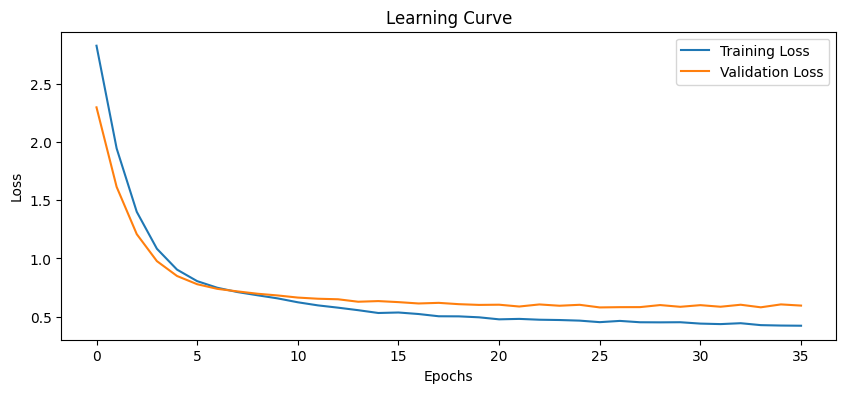

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend()
plt.show()

# Step 7 - Model Evaluation

In [72]:
model.evaluate(xtrain, ytrain)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9536 - loss: 0.4371 


[0.4421756863594055, 0.9449999928474426]

In [73]:
model.evaluate(xtest, ytest)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7586 - loss: 0.6668


[0.6431863903999329, 0.7699999809265137]

In [74]:
yprob_train = model.predict(xtrain)
yprob_train[0:5]

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


array([[0.09083866],
       [0.9031065 ],
       [0.05422933],
       [0.07687126],
       [0.9611437 ]], dtype=float32)

In [75]:
ypred_train = (yprob_train >= 0.5).astype(int).flatten()
ypred_train[0:5]

array([0, 1, 0, 0, 1])

In [76]:
ytrain.head()

,Liked
29,0
535,1
695,0
557,0
836,1


In [77]:
yprob_test = model.predict(xtest)
yprob_test[0:5]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[0.34029144],
       [0.9325242 ],
       [0.94550467],
       [0.9400766 ],
       [0.57669324]], dtype=float32)

In [78]:
ypred_test = (yprob_test >= 0.5).astype(int).flatten()
ypred_test[0:5]

array([0, 1, 1, 1, 1])

In [79]:
ytest.head()

,Liked
521,1
737,1
740,1
660,1
411,1


# Step 8 - Out of Sample Prediction

In [86]:
def analyse_sentiment(model, tfidf, svd):
  text = input("Please write the Review: ")
  text = preprocess_text(text)
  text_pre = tfidf.transform([text]).toarray()
  text_pre_red = svd.transform(text_pre)
  yprob = model.predict([text_pre_red])
  if yprob >= 0.5:
    print("Positive Sentiment")
    ypred = 1
  else:
    print("Negative Sentiment")
    ypred = 0
  return ypred, yprob

In [87]:
analyse_sentiment(model, tfidf, svd)

Please write the Review: Wow! Amazing Service
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Positive Sentiment


(1, array([[0.9155514]], dtype=float32))

In [88]:
analyse_sentiment(model, tfidf, svd)

Please write the Review: Amazing Restaurant! Really liked the service..
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Positive Sentiment


(1, array([[0.94747025]], dtype=float32))

# Step 9 - Save & Load

### Save the object, tfidf, svd, model

In [89]:
import joblib
joblib.dump(tfidf, 'tfidf.joblib')
joblib.dump(svd, 'svd.joblib')
model.save('sentiment_model.keras')

### Load

In [90]:
tfidf = joblib.load('tfidf.joblib')
svd = joblib.load('svd.joblib')

from tensorflow.keras.models import load_model

m = load_model("sentiment_model.keras")

In [91]:
m.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 140,549 (549.02 KB)

 Trainable params: 46,849 (183.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 93,700 (366.02 KB)